In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
rng = np.random.default_rng(123)

In [ ]:
df = pd.read_csv('Categoriesnumber.csv')

In [4]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        )
        


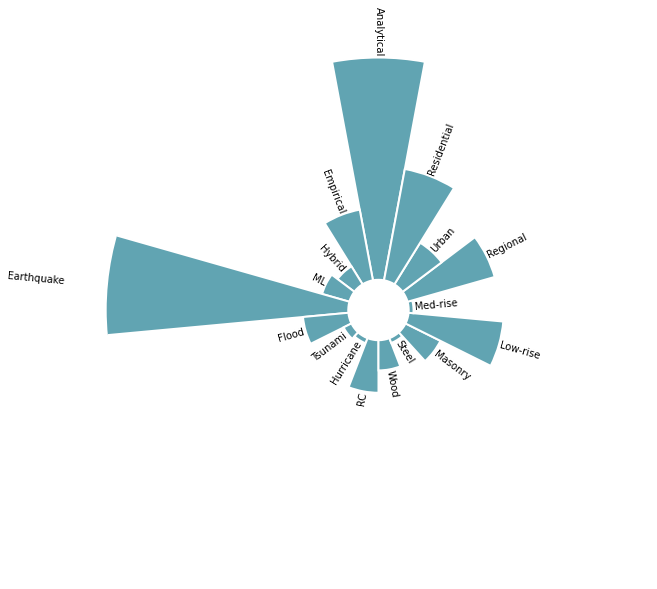

In [5]:
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["Number"].values
LABELS = df["Area"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 800)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

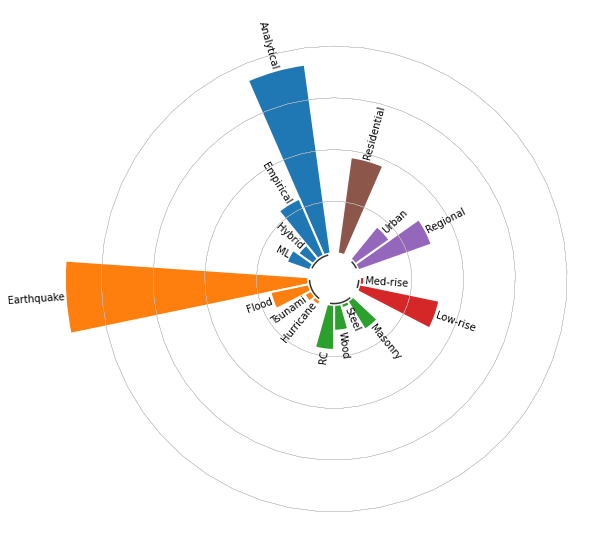

In [52]:
# Grab the group values
GROUP = df["Category"].values

# Add three empty bars to the end of each group
PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
GROUPS_SIZE = [4, 4, 4, 2, 2, 1]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 950)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [4, 4, 4, 2, 2, 1]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars. 
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

offset = 0 
for group, size in zip(["A", "B", "C", "D", "E", "F"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD-1 ], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(2*np.pi, ANGLES[0], num=50)
    ax.plot(x2, [200] * 50, color="#bebebe", lw=0.2)
    ax.plot(x2, [400] * 50, color="#bebebe", lw=0.2)
    ax.plot(x2, [600] * 50, color="#bebebe", lw=0.2)
    ax.plot(x2, [800] * 50, color="#bebebe", lw=0.2)
    
    offset += size + PAD

In [40]:
ANGLES

array([0.        , 0.27318197, 0.54636394, 0.81954591, 1.09272788,
       1.36590985, 1.63909182, 1.91227379, 2.18545576, 2.45863773,
       2.7318197 , 3.00500167, 3.27818364, 3.55136561, 3.82454758,
       4.09772955, 4.37091152, 4.64409349, 4.91727546, 5.19045743,
       5.4636394 , 5.73682137, 6.01000334])

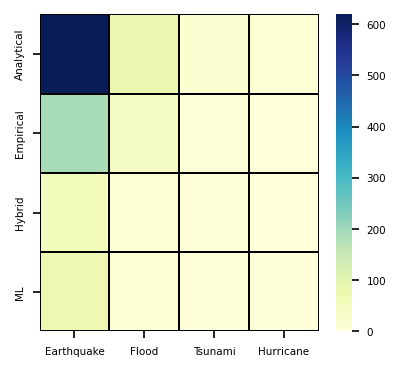

In [18]:
# libraries
import seaborn as sns
import pandas as pd
import numpy as np
 
# Create a dataset
df = df = pd.read_csv('Heatmap 1.csv')

df.index = ['Analytical', 'Empirical', 'Hybrid', 'ML']

fig, ax = plt.subplots( figsize=(3,2.8), dpi=150)
plt.rc('font',size=5)
plt.rc('axes',titlesize=5)
plt.rc('axes',labelsize=5)
plt.rc('xtick',labelsize=5)
plt.rc('ytick',labelsize=5)
plt.rc('legend',fontsize=5)
plt.rc('figure',titlesize=5)

# plot a heatmap with annotation
sns.heatmap(df, linewidths = 0.05, linecolor = "black", annot_kws={"size": 5}, fmt="0.0f" ,cmap="YlGnBu")
fig.savefig(f'hmp1.png')

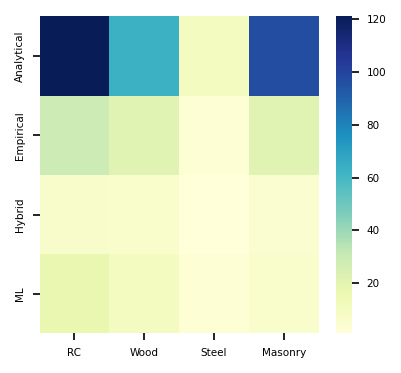

In [11]:
df = df = pd.read_csv('Heatmap 2.csv')

df.index = ['Analytical', 'Empirical', 'Hybrid', 'ML']

fig, ax = plt.subplots( figsize=(3,2.8), dpi=150)
plt.rc('font',size=5)
plt.rc('axes',titlesize=7)
plt.rc('axes',labelsize=7)
plt.rc('xtick',labelsize=5)
plt.rc('ytick',labelsize=5)
plt.rc('legend',fontsize=5)
plt.rc('figure',titlesize=5)

# plot a heatmap with annotation
sns.heatmap(df, linewidths = 0.05, linecolor = "black", annot_kws={"size": 5}, fmt="0.0f" ,cmap="YlGnBu")
fig.savefig(f'hmp2.png')

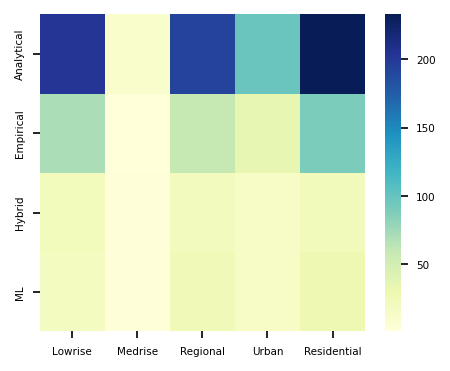

In [12]:
df = df = pd.read_csv('Heatmap 3.csv')

df.index = ['Analytical', 'Empirical', 'Hybrid', 'ML']

fig, ax = plt.subplots( figsize=(3.5,2.8), dpi=150)
plt.rc('font',size=5)
plt.rc('axes',titlesize=7)
plt.rc('axes',labelsize=7)
plt.rc('xtick',labelsize=5)
plt.rc('ytick',labelsize=5)
plt.rc('legend',fontsize=5)
plt.rc('figure',titlesize=5)

# plot a heatmap with annotation
sns.heatmap(df, annot_kws={"size": 5}, fmt="0.0f" ,cmap="YlGnBu")
fig.savefig(f'hmp3.png')

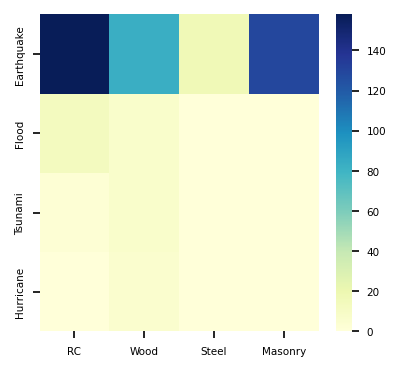

In [13]:
df = df = pd.read_csv('Heatmap 4.csv')

df.index = ['Earthquake', 'Flood', 'Tsunami' , 'Hurricane']

fig, ax = plt.subplots( figsize=(3,2.8), dpi=150)
plt.rc('font',size=5)
plt.rc('axes',titlesize=7)
plt.rc('axes',labelsize=7)
plt.rc('xtick',labelsize=5)
plt.rc('ytick',labelsize=5)
plt.rc('legend',fontsize=5)
plt.rc('figure',titlesize=5)

# plot a heatmap with annotation
sns.heatmap(df, annot_kws={"size": 5}, fmt="0.0f" ,cmap="YlGnBu")
fig.savefig(f'hmp4.png')

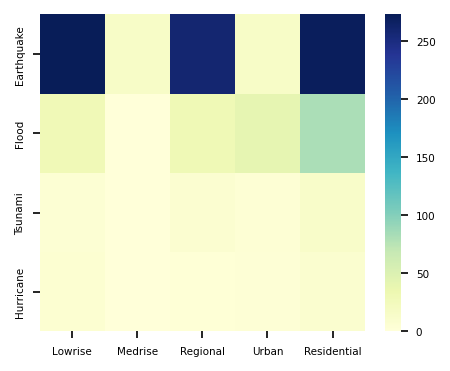

In [14]:
df = df = pd.read_csv('Heatmap 5.csv')

df.index = ['Earthquake', 'Flood', 'Tsunami' , 'Hurricane']

fig, ax = plt.subplots( figsize=(3.5,2.8), dpi=150)
plt.rc('font',size=5)
plt.rc('axes',titlesize=7)
plt.rc('axes',labelsize=7)
plt.rc('xtick',labelsize=5)
plt.rc('ytick',labelsize=5)
plt.rc('legend',fontsize=5)
plt.rc('figure',titlesize=5)

# plot a heatmap with annotation
sns.heatmap(df, annot_kws={"size": 5}, fmt="0.0f" ,cmap="YlGnBu")
fig.savefig(f'hmp5.png')